In [1]:
import numpy as np
import pandas as pd
from dside import DSI
import matplotlib.pyplot as plt
import GPy
from smt.sampling_methods import LHS
from kernel_opt_fun import *

In [2]:
# step 1. Mathematical problem formulation
# Define the objective function which can be any 4D function
def f(X):
    #GTCD function
    return 8.61 * np.exp(5) * X[:, 0]**(1/2) * X[:, 1] * X[:, 2]**(-2) * X[:, 3]**(-1/2) +  3.69 * np.exp(4) * X[:, 2] + 7.72 * np.exp(8) * X[:, 0]**(-1) * X[:, 1]**0.219 - 765.43 * np.exp(6) * X[:, 0]**(-1)

#step 2. Surrogate model training
#Generate LHS training samples
xlimits = np.array([
    [20,50],
    [1,10], 
    [20,50],
    [0.1, 60]
])
sampling = LHS(xlimits=xlimits, criterion='ese')

n = 100 # the size of the training set is user defined, 100*D gives high fidelity surrogate model
x_LHS = sampling(n)


# Create input X arrays
X1 = x_LHS[:,0]
X2 = x_LHS[:,1]
X3 = x_LHS[:,2]
X4 = x_LHS[:,3]


In [3]:
X = np.vstack((X1.flatten(), X2.flatten(), X3.flatten(), X4.flatten())).T
Y = f(X).reshape(-1, 1)

# kernel optimisation
best_kernel, best_mea = find_best_kernel(X, Y, input_dim=4)
print("Best kernel:", kernel_to_str(best_kernel))
print("Best MEA:", best_mea)
# GPR training
model = GPy.models.GPRegression(X, Y, best_kernel)


reconstraining parameters std_periodic.lengthscale
reconstraining parameters std_periodic.variance
reconstraining parameters std_periodic.period


Kernel: rbf + rbf_1, MAE: 30.995890956202675
Kernel: rbf * rbf_1, MAE: 49.732612638638514


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply


Kernel: rbf + linear, MAE: 554.524975242554
Kernel: rbf * linear, MAE: 62.24085912979835


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:774: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:779: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:786: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply


Kernel: rbf + RatQuad, MAE: 319.5762507637212
Kernel: rbf * RatQuad, MAE: 2479.3485462491635


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply


Kernel: rbf + std_periodic, MAE: 96.77264017460712
Kernel: rbf * std_periodic, MAE: 160.83252415788493
Kernel: linear + rbf, MAE: 554.5250062403322


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply


Kernel: linear * rbf, MAE: 62.2408591418357
Kernel: linear + linear_1, MAE: 2362.2948892551544
Kernel: linear * linear_1, MAE: 2479.3485462491635
Kernel: linear + RatQuad, MAE: 610.6421643648152


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:781: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:781: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply


Kernel: linear * RatQuad, MAE: 48.50542932712178
Kernel: linear + std_periodic, MAE: 2317.735674903998
Kernel: linear * std_periodic, MAE: 2479.4480428818943
Kernel: RatQuad + rbf, MAE: 319.57625076879384


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:774: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:779: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:786: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply


Kernel: RatQuad * rbf, MAE: 2479.3485462491635
Kernel: RatQuad + linear, MAE: 610.642164365409


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:781: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:781: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply


Kernel: RatQuad * linear, MAE: 48.50543184197213


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:781: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply


Kernel: RatQuad + RatQuad_1, MAE: 448.82648161715014
Kernel: RatQuad * RatQuad_1, MAE: 35.093450423905324


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:781: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:788: RuntimeWarning:invalid value encountered in multiply
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:774: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:779: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/GPy/kern/src/stationary.py:786: RuntimeWarning:overflow encountered in square
 /Library/Frameworks/Python.fram

Kernel: RatQuad + std_periodic, MAE: 447.3724898145818
Kernel: RatQuad * std_periodic, MAE: 212.82958524794063
Kernel: std_periodic + rbf, MAE: 467.9925844489152
Kernel: std_periodic * rbf, MAE: 160.8323503319062
Kernel: std_periodic + linear, MAE: 2387.6941125469307
Kernel: std_periodic * linear, MAE: 2479.268055238264
Kernel: std_periodic + RatQuad, MAE: 37.22510147138128
Kernel: std_periodic * RatQuad, MAE: 109.46012729671683
Kernel: std_periodic + std_periodic_1, MAE: 2479.3485370507165
Kernel: std_periodic * std_periodic_1, MAE: 2479.3485465118492


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 + rbf_2, MAE: 49.02329370382731


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * rbf, MAE: 44.65606703007197
Kernel: rbf + rbf_1 + linear, MAE: 49.02373435779964


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * linear, MAE: 62.24085732727008


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 + RatQuad, MAE: 44.99740035524901


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad, MAE: 42.05979276663002


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 + std_periodic, MAE: 49.015206869538176


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * std_periodic, MAE: 117.92367314713564


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad + rbf, MAE: 42.064089082836475


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * rbf, MAE: 42.06331384545501


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad + linear, MAE: 42.06730319923099


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear, MAE: 40.085262841415805


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad + RatQuad, MAE: 42.0651038817161


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * RatQuad_1, MAE: 42.05999676501688


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad + std_periodic, MAE: 42.201027480422816


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * std_periodic, MAE: 101.17232899038645


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear + rbf, MAE: 40.08793394347767


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * rbf, MAE: 2479.327761508811
Kernel: rbf + rbf_1 * RatQuad * linear + linear, MAE: 40.08480883954208


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * linear_1, MAE: 112.01695386297334
Kernel: rbf + rbf_1 * RatQuad * linear + RatQuad, MAE: 40.08781578211229


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1, MAE: 39.87206366412083


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear + std_periodic, MAE: 40.68706395297359


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * std_periodic, MAE: 145.82647948641335


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 + rbf, MAE: 39.87997141755859


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 * rbf, MAE: 2479.3277429022187
Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 + linear, MAE: 39.875001394895115


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 * linear_1, MAE: 107.75208154246793
Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 + RatQuad, MAE: 39.8798727308933


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 * RatQuad_2, MAE: 39.86826459891836
Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 + std_periodic, MAE: 39.86249320260922


 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 * std_periodic, MAE: 175.64886125454686

Results of each iteration:
Iteration 1: Best Kernel: rbf + rbf_1, MAE: 30.99589
Iteration 2: Best Kernel: rbf + rbf_1 * RatQuad, MAE: 42.05979
Iteration 3: Best Kernel: rbf + rbf_1 * RatQuad * linear, MAE: 40.08526
Iteration 4: Best Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1, MAE: 39.87206
Iteration 5: Best Kernel: rbf + rbf_1 * RatQuad * linear * RatQuad_1 + std_periodic, MAE: 39.86249
Best kernel: rbf + rbf_1
Best MEA: 30.995890956202675


In [4]:

# hyperparameter optimisation
model.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0003   6.325746e+02   9.118572e-02 
    00s03  0006   6.311927e+02   1.949133e-01 
    00s05  0010   6.302438e+02   3.535964e-03 
    00s08  0016   6.302226e+02   6.539312e-10 
Runtime:     00s08
Optimization status: Converged



 /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [5]:


# Re-generate sample points for plotting (finer grid)
n = 20
X1 = np.linspace(20, 50, n)
X2 = np.linspace(1, 10, n)
X3 = np.linspace(20, 50, n)
X4 = np.linspace(0.1, 60, n)
X1, X2, X3, X4 = np.meshgrid(X1, X2, X3, X4)
X = np.vstack((X1.flatten(), X2.flatten(), X3.flatten(), X4.flatten())).T
Y = f(X).reshape(-1, 1)

# Step 4: Predict
X_pred = X
Y_pred, Y_pred_var = model.predict(X_pred)

# Reshape for plotting
Y_pred = Y_pred.reshape(X1.shape)
Y_true = f(X_pred).reshape(X1.shape)



In [6]:
#Surrogate metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 
#large MAE can indicate bigger scale of a problem compared to previous examples
MAE = mean_absolute_error(Y, Y_pred.reshape(-1, 1))
MAPE = mean_absolute_percentage_error(Y, Y_pred.reshape(-1, 1))
print(f"MAE = {MAE:.3f}")
#print(f"MAPE = {MAPE*100:.2f}%") #uncomment if using MAPE from sklearn


MAE = 28.513


In [7]:
# Calculate the percentage of small values baaed on Ytrue
#helps investigate large MAPE 
threshold = 1e-3
percentsmallY = percentage_small_values(Y, threshold)
print(f"Percentage of small true values (|Y_true| < {threshold}): {percentsmallY:.2f}%")

# Calculate custom MAPE
custom_MAPE = custom_mape(Y, Y_pred.reshape(-1, 1))
print(f"Custom MAPE = {custom_MAPE:.2f}%")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2score = r2_score(Y, Y_pred.reshape(-1, 1))
MSE = mean_squared_error(Y, Y_pred.reshape(-1, 1))
print(f"R2 = {R2score:.2f}")
print(f"MSE = {MSE:.5f}")

Percentage of small true values (|Y_true| < 0.001): 0.00%
Custom MAPE = 3.74%
R2 = 1.00
MSE = 3386.52248


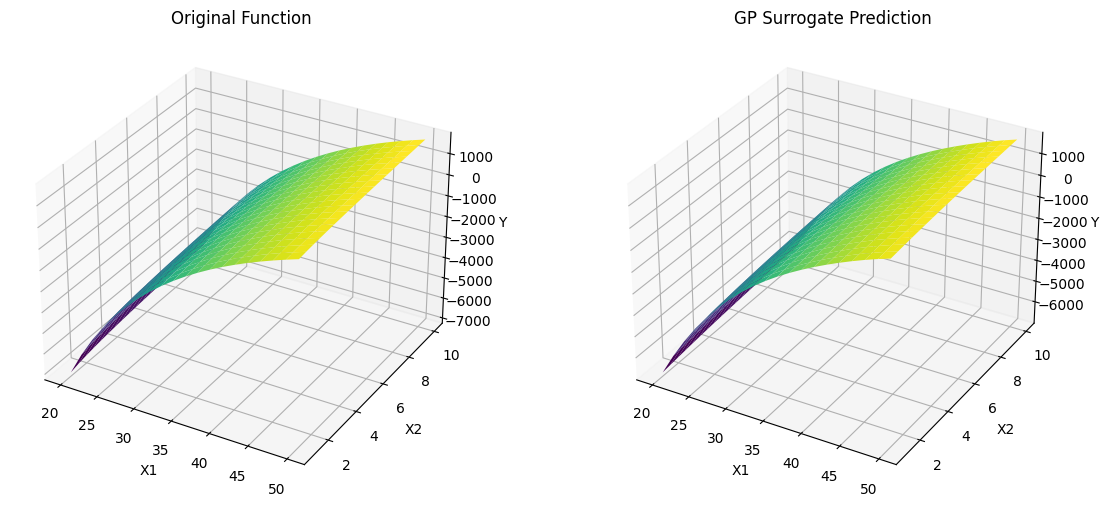

In [8]:
# Plotting of the original vs surrogate 
# Note: Plotting a 3D surface is not directly possible for 4D data (X1, X2, X3, Y).
# So we will plot slices or projections. Here we plot a slice where X3 is fixed.

# Select fixed slices for X3 and X4 for visualization
slice_index_X3 = n // 2
slice_index_X4 = n // 2
X1_slice = X1[:, :, slice_index_X3, slice_index_X4]
X2_slice = X2[:, :, slice_index_X3, slice_index_X4]
Y_true_slice = Y_true[:, :, slice_index_X3, slice_index_X4]
Y_pred_slice = Y_pred[:, :, slice_index_X3, slice_index_X4]

# Plotting
fig = plt.figure(figsize=(14, 6))

# Original data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1_slice, X2_slice, Y_true_slice, cmap='viridis')
ax1.set_title('Original Function')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')

# Surrogate model prediction
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X1_slice, X2_slice, Y_pred_slice, cmap='viridis')
ax2.set_title('GP Surrogate Prediction')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')

plt.show()

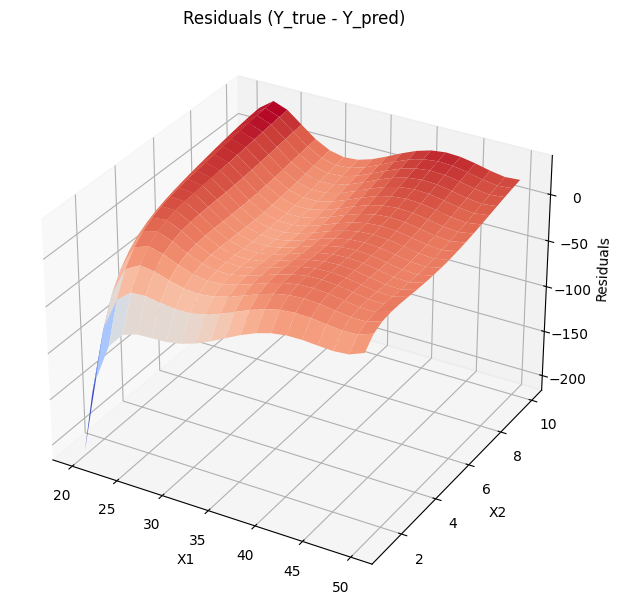

In [9]:
# Calculate residuals
residuals = Y_true_slice - Y_pred_slice

# # Plotting
#fig = plt.figure(figsize=(14, 6))
fig = plt.figure(figsize=(25,25), dpi=100)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1_slice, X2_slice, residuals, cmap='coolwarm')
ax1.set_title('Residuals (Y_true - Y_pred)')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Residuals')
plt.subplots_adjust(left=0.1, right=0.6, top=0.85, bottom=0.15)
plt.show()

In [10]:
# Flatten the arrays
X1_flat = X1.flatten()
X2_flat = X2.flatten()
X3_flat = X3.flatten()
X4_flat = X4.flatten()
Y_true_flat = Y_true.flatten()
Y_pred_flat = Y_pred.flatten()

# Create a DataFrame
data = {
    'X1': X1_flat,
    'X2': X2_flat,
    'X3': X3_flat,
    'X4': X4_flat,
    'Y_true': Y_true_flat,
    'Y_pred': Y_pred_flat,
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

          X1    X2    X3         X4        Y_true        Y_pred
0       20.0   1.0  20.0   0.100000 -10214.653444 -10002.864342
1       20.0   1.0  20.0   3.252632 -10251.910211 -10106.970552
2       20.0   1.0  20.0   6.405263 -10254.186839 -10156.509579
3       20.0   1.0  20.0   9.557895 -10255.210671 -10167.253986
4       20.0   1.0  20.0  12.710526 -10255.824543 -10153.264970
...      ...   ...   ...        ...           ...           ...
159995  50.0  10.0  50.0  47.389474   4664.763438   4611.768704
159996  50.0  10.0  50.0  50.542105   4664.597056   4609.420677
159997  50.0  10.0  50.0  53.694737   4664.445552   4606.155047
159998  50.0  10.0  50.0  56.847368   4664.306832   4605.028081
159999  50.0  10.0  50.0  60.000000   4664.179195   4610.616583

[160000 rows x 6 columns]


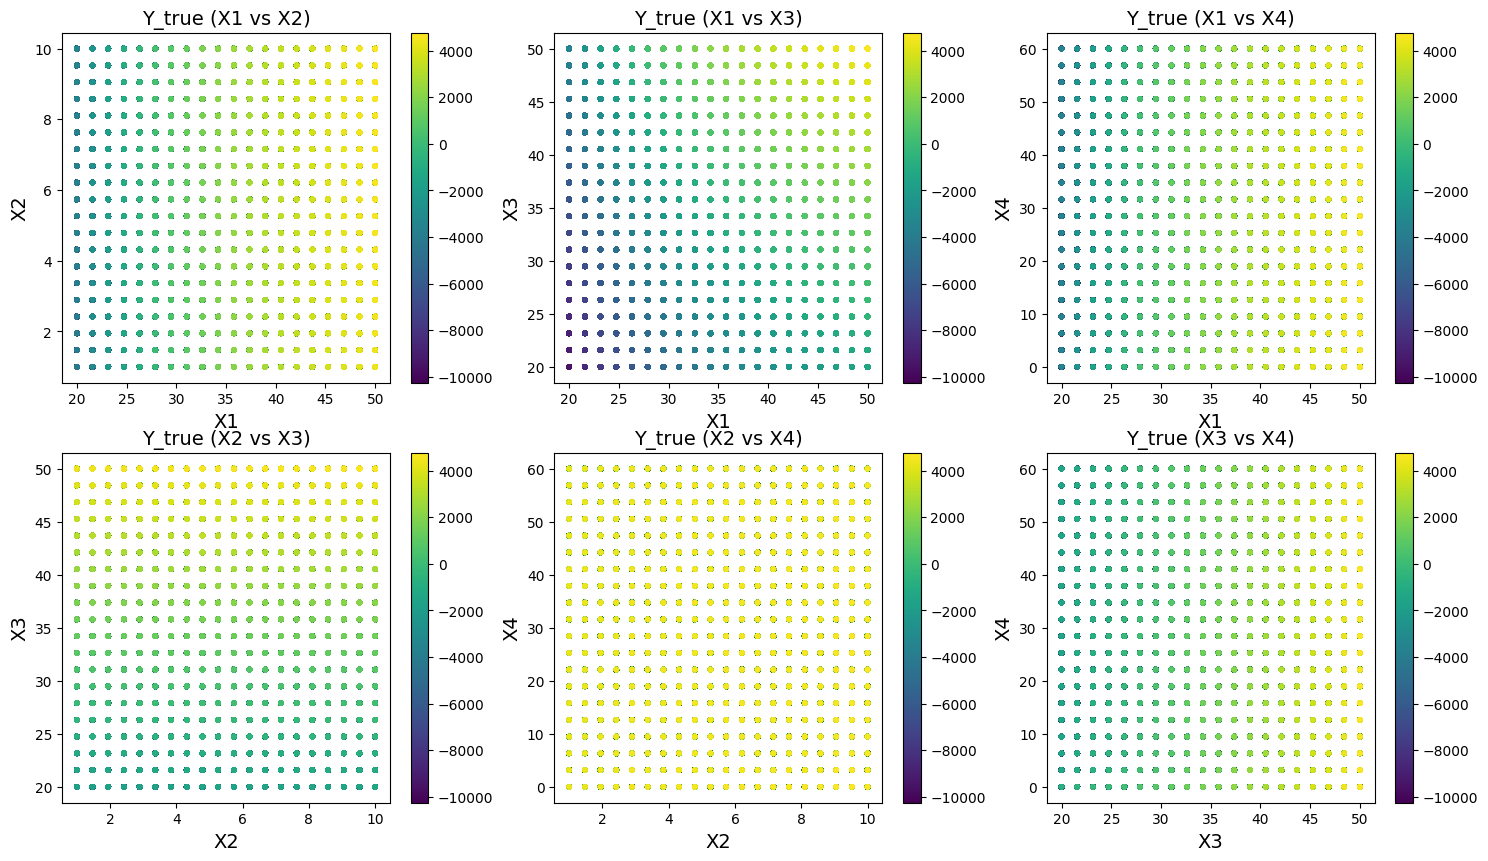

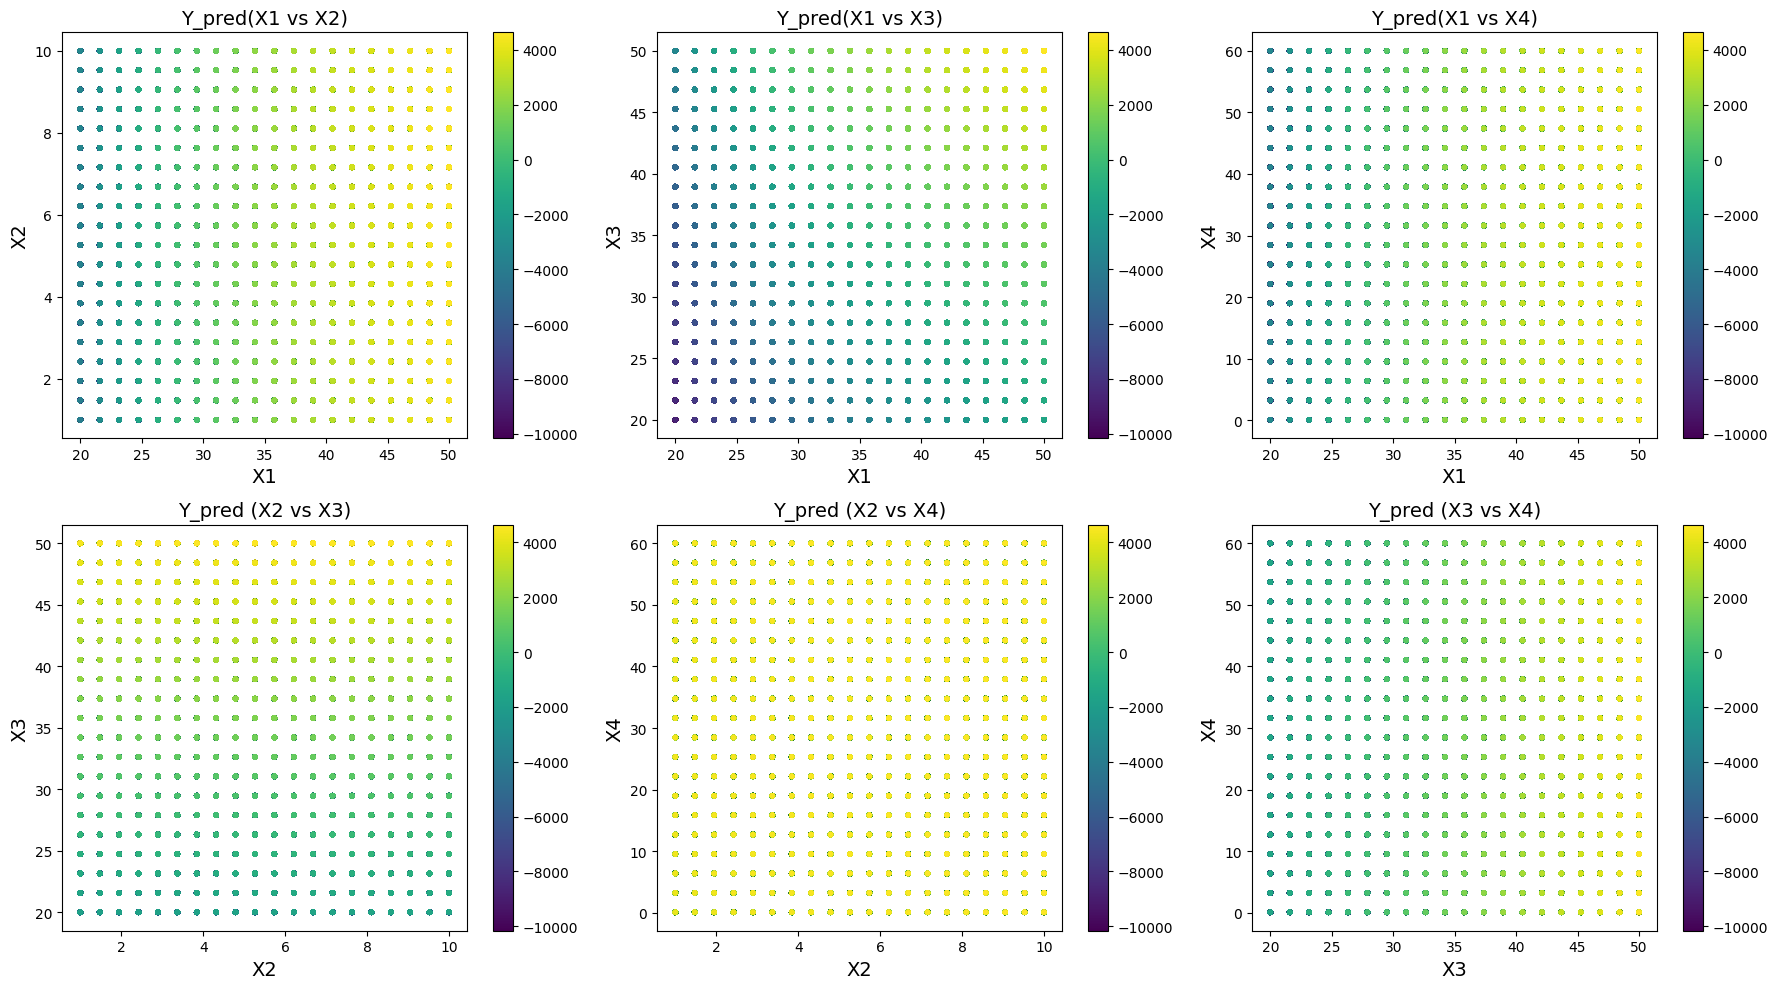

In [11]:
#uncomment for 2D plotting of Ytrue vs Ypred
import matplotlib.pyplot as plt

# Assuming df contains X1, X2, X3, X4, Y_true, and Y_pred
fig, ax = plt.subplots(2,3, figsize=(18, 10))  # 2 rows, 4 columns layout for 6 plots
fs = 14

# List of variable pairs to plot
pairs = [('X1', 'X2'), ('X1', 'X3'), ('X1', 'X4'),
         ('X2', 'X3'), ('X2', 'X4'),('X3', 'X4')]

# Plotting combinations for Y_true

for i, (x_var, y_var) in enumerate(pairs):
    if  i<3:
        sc = ax[0, i].scatter(df[x_var], df[y_var], c=df['Y_true'], marker='.', cmap='viridis')
        cbar = fig.colorbar(sc, ax=ax[0, i])
        ax[0, i].set_title(f'Y_true ({x_var} vs {y_var})', fontsize=fs)
        ax[0, i].set_xlabel(x_var, fontsize=fs)
        ax[0, i].set_ylabel(y_var, fontsize=fs)
    else: 
        sc = ax[1, i-3].scatter(df[x_var], df[y_var], c=df['Y_true'], marker='.', cmap='viridis')
        cbar = fig.colorbar(sc, ax=ax[1, i-3])
        ax[1, i-3].set_title(f'Y_true ({x_var} vs {y_var})', fontsize=fs)
        ax[1, i-3].set_xlabel(x_var, fontsize=fs)
        ax[1, i-3].set_ylabel(y_var, fontsize=fs)

fig, ax = plt.subplots(2,3, figsize=(18, 10))  # 2 rows, 4 columns layout for 6 plots
fs = 14


# # Plotting combinations for Y_pred
for i, (x_var, y_var) in enumerate(pairs):
    if  i<3:
        sc = ax[0, i].scatter(df[x_var], df[y_var], c=df['Y_pred'], marker='.', cmap='viridis')
        cbar = fig.colorbar(sc, ax=ax[0, i])
        ax[0, i].set_title(f'Y_pred({x_var} vs {y_var})', fontsize=fs)
        ax[0, i].set_xlabel(x_var, fontsize=fs)
        ax[0, i].set_ylabel(y_var, fontsize=fs)
    else: 
        sc = ax[1, i-3].scatter(df[x_var], df[y_var], c=df['Y_pred'], marker='.', cmap='viridis')
        cbar = fig.colorbar(sc, ax=ax[1, i-3])
        ax[1, i-3].set_title(f'Y_pred ({x_var} vs {y_var})', fontsize=fs)
        ax[1, i-3].set_xlabel(x_var, fontsize=fs)
        ax[1, i-3].set_ylabel(y_var, fontsize=fs)

plt.tight_layout()
plt.show()


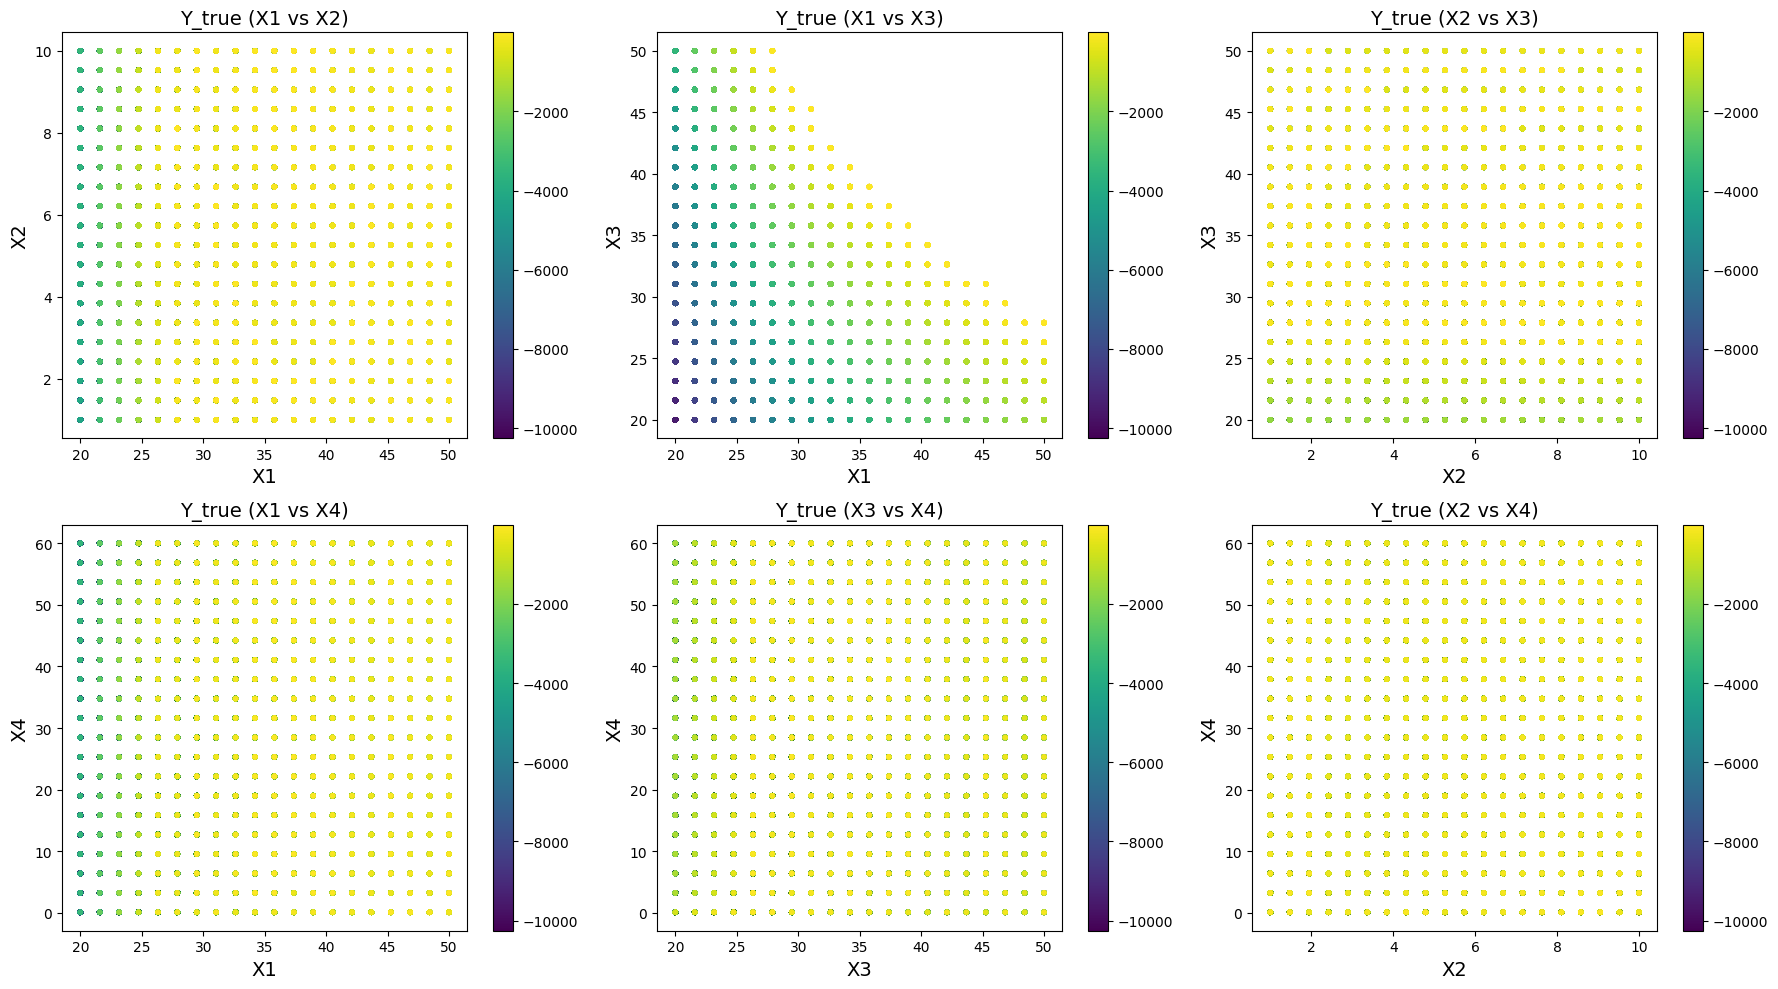

In [12]:
#cut through a point  (2D plots)

#2D plots
ptol = 20 #plots work just barely anything passess through 0
pp = 0 #NP = [35, 5, 35, 30] #midranges since that the NP explored 
# fm_X1 = ((df['Y_true'] <= 0 ) & ((df['X1'] < pp + ptol) & (df['X1'] > pp - ptol)))
# fm_X2 = ((df['Y_true'] <= 0 ) & ((df['X2'] < pp + ptol) & (df['X2'] > pp - ptol)))
# fm_X3 = ((df['Y_true'] <= 0 ) & ((df['X3'] < pp + ptol) & (df['X3'] > pp - ptol)))
# fm_X4 = ((df['Y_true'] <= 0 ) & ((df['X4'] < pp + ptol) & (df['X4'] > pp - ptol)))

fm_X1 = ((df['Y_true'] <= 0 ) & ((df['X1'] < 35 + ptol) & (df['X1'] > 35 - ptol)))
fm_X2 = ((df['Y_true'] <= 0 ) & ((df['X2'] < 5 + ptol) & (df['X2'] > 5 - ptol)))
fm_X3 = ((df['Y_true'] <= 0 ) & ((df['X3'] < 35 + ptol) & (df['X3'] > 35 - ptol)))
fm_X4 = ((df['Y_true'] <= 0 ) & ((df['X4'] < 30 + ptol) & (df['X4'] > 30 - ptol)))

fig, ax = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns layout for better visualization
fs = 14

# Plotting combinations for Y_true
sc1 = ax[0, 0].scatter(df['X1'][fm_X3 & fm_X4], df['X2'][fm_X3 & fm_X4], c=df['Y_true'][fm_X3 & fm_X4], marker='.', cmap='viridis')
cbar1 = fig.colorbar(sc1, ax=ax[0, 0])
ax[0, 0].set_title('Y_true (X1 vs X2)', fontsize=fs)
ax[0, 0].set_xlabel('X1', fontsize=fs)
ax[0, 0].set_ylabel('X2', fontsize=fs)
# ax[0, 0].set_xlim([-1,1])
# ax[0, 0].set_ylim([-1,1])

sc2 = ax[0, 1].scatter(df['X1'][fm_X2 & fm_X4], df['X3'][fm_X2 & fm_X4], c=df['Y_true'][fm_X2 & fm_X4], marker='.', cmap='viridis')
cbar2 = fig.colorbar(sc2, ax=ax[0, 1])
ax[0, 1].set_title('Y_true (X1 vs X3)', fontsize=fs)
ax[0, 1].set_xlabel('X1', fontsize=fs)
ax[0, 1].set_ylabel('X3', fontsize=fs)
# ax[0, 1].set_xlim([-1,1])
# ax[0, 1].set_ylim([-1,1])

sc3 = ax[0, 2].scatter(df['X2'][fm_X1 & fm_X4], df['X3'][fm_X1 & fm_X4], c=df['Y_true'][fm_X1 & fm_X4], marker='.', cmap='viridis')
cbar3 = fig.colorbar(sc3, ax=ax[0, 2])
ax[0, 2].set_title('Y_true (X2 vs X3)', fontsize=fs)
ax[0, 2].set_xlabel('X2', fontsize=fs)
ax[0, 2].set_ylabel('X3', fontsize=fs)
# ax[0, 2].set_xlim([-1,1])
# ax[0, 2].set_ylim([-1,1])

sc4 = ax[1, 0].scatter(df['X1'][fm_X3 & fm_X2], df['X4'][fm_X3 & fm_X2], c=df['Y_true'][fm_X3 & fm_X2], marker='.', cmap='viridis')
cbar1 = fig.colorbar(sc1, ax=ax[1, 0])
ax[1, 0].set_title('Y_true (X1 vs X4)', fontsize=fs)
ax[1, 0].set_xlabel('X1', fontsize=fs)
ax[1, 0].set_ylabel('X4', fontsize=fs)
# ax[1, 0].set_xlim([-1,1])
# ax[1, 0].set_ylim([-1,1])

sc5 = ax[1, 1].scatter(df['X3'][fm_X2 & fm_X1], df['X4'][fm_X2 & fm_X1], c=df['Y_true'][fm_X2 & fm_X1], marker='.', cmap='viridis')
cbar2 = fig.colorbar(sc2, ax=ax[1, 1])
ax[1, 1].set_title('Y_true (X3 vs X4)', fontsize=fs)
ax[1, 1].set_xlabel('X3', fontsize=fs)
ax[1, 1].set_ylabel('X4', fontsize=fs)
# ax[1, 1].set_xlim([-1,1])
# ax[1, 1].set_ylim([-1,1])

sc6 = ax[1, 2].scatter(df['X2'][fm_X1 & fm_X3], df['X4'][fm_X1 & fm_X3], c=df['Y_true'][fm_X1 & fm_X3], marker='.', cmap='viridis')
cbar3 = fig.colorbar(sc3, ax=ax[1, 2])
ax[1, 2].set_title('Y_true (X2 vs X4)', fontsize=fs)
ax[1, 2].set_xlabel('X2', fontsize=fs)
ax[1, 2].set_ylabel('X4', fontsize=fs)
# ax[1, 2].set_xlim([-1,1])
# ax[1, 2].set_ylim([-1,1])

plt.tight_layout()
plt.show()

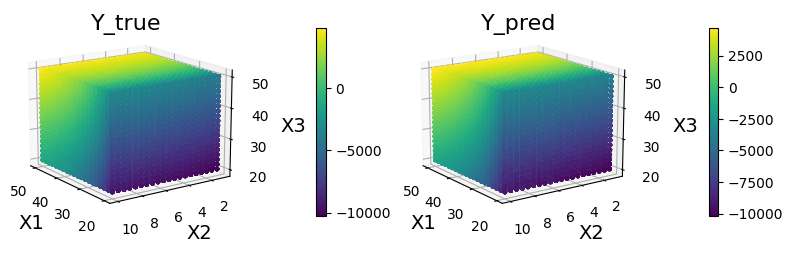

In [13]:
# uncomment for 3D plotting of Ytrue vs Ypred

fs = 14
fig = plt.figure(figsize = (8, 3))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
s1 = ax1.scatter(X1, X2, X3, c = Y_true, marker = '.')
cbar1 = fig.colorbar(s1, ax = ax1, fraction = 0.03, pad = 0.25)
ax1.view_init(15, 145)
ax1.set_title('Y_true', fontsize = fs + 2, y = 0.95)
ax1.set_xlabel('X1', fontsize = fs)
ax1.set_ylabel('X2', fontsize = fs)
ax1.set_zlabel('X3', fontsize = fs)

ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
s2 = ax2.scatter(X1, X2, X3, c = Y_pred, marker = '.')
cbar2 = fig.colorbar(s2, ax = ax2, fraction = 0.03, pad = 0.25)
ax2.view_init(15, 145)
ax2.set_title('Y_pred', fontsize = fs + 2, y = 0.95)
ax2.set_xlabel('X1', fontsize = fs)
ax2.set_ylabel('X2', fontsize = fs)
ax2.set_zlabel('X3', fontsize = fs)


plt.tight_layout()
plt.show()

In [14]:

#GP mathematical model function for slicing later
#step 3. Surrogate model simulation
def GTCD(X):
    Y_pred, Y_pred_var = model.predict(X)
    X1 = np.array(X[:,0])
    X2 = np.array(X[:,1])
    X3 = np.array(X[:,2])
    X4 = np.array(X[:,3])
    Y_true = np.array(8.61 * np.exp(5) * X1**(1/2) * X2 * X3**(-2) * X4**(-1/2) +  3.69 * np.exp(4) * X3 + 7.72 * np.exp(8) * X1**(-1) * X2**0.219 - 765.43 * np.exp(6) * X1**(-1))

    X1_flat = X1.flatten()
    X2_flat = X2.flatten()
    X3_flat = X3.flatten()
    X4_flat = X4.flatten()
    Y_true_flat = Y_true.flatten()
    Y_pred_flat = Y_pred.flatten()

    # Create a DataFrame
    data = {
        'X1': X1_flat,
        'X2': X2_flat,
        'X3': X3_flat,
        'X4': X4_flat,
        'Y_true': Y_true_flat,
        'Y_pred': Y_pred_flat,
    }
    
    df = pd.DataFrame(data)
    #add objective function constraint values
    df['G1'] = X4_flat * X2_flat**(-2) + X2_flat**(-2) - 1
    return df

In [15]:
#step 4. DSp identification
#DSp with the slicing tool

#declaring the problem info 
# Global variables
maxvp = 0

u = -0
cons = {'Y_pred': [-1e20, 0], 'G1': [-1e20, u]} 

benchmark_problems = {'GTCD':    GTCD}
sv4D = ['X1', 'X2', 'X3', 'X4']
problem_sv = {'GTCD':    sv4D}


problem_list = ['GTCD']
opt_hidedsp = {'hidedsp': True, 'hidevio': True}
no_samples = 4096
benchmark_sol_4DGP = {} 

#nominal point for analysis
NP = [35, 5, 35, 30] #midranges

opt_find_DSp = {'hidedsp': False, 'opt_amul': True, 'maxvp': maxvp, 'tol': -1e5, 'ub': 1, 'lb': 0} #bisection run bounds

In [16]:
    
def get_XconstNP(constant_dict, sv, lb, ub, no_samples, sampling_method, F_sam_plot):
    import numpy as np
    index_cut = []
    index_constant = []
    for l in sv:
        if l not in list(constant_dict.keys()):
            index_cut.append(sv.index(l))
        else:
            index_constant.append(sv.index(l))
    #print('getfun:const',index_constant, 'nonconst', index_cut)
    lb_cut = np.array(lb)[index_cut]
    ub_cut = np.array(ub)[index_cut]
    sv_cut = (np.array(sv)[index_cut]).tolist()
    #print('sv_cut', sv_cut)
    Xcut = Sobol_sequence(lb_cut, ub_cut)
    Xnew = np.zeros((Xcut.shape[0], len(sv)))
    Xnew[:, index_cut] = Xcut
    #print('Xnew before filling in constants', Xnew)
    Xnew[:, index_constant] = np.array([constant_dict[l] for l in list(constant_dict.keys())])
    #print('Xnew after filling in constants', Xnew)
    return Xnew, sv_cut

def get_slices_dfNP(no_slices, sv, lb, ub, no_samples, sampling_method, F_sam_plot, f, NP):
    import numpy as np
    import pandas as pd
    all_slices = []
    for slice_no in no_slices:
        constant_vars = [sv[slice_no]]
        ### ~ adapted to high D problem ~ ###
        if len(sv)>4: #can be lowered for 2D DSp
            if slice_no < (len(sv)-1):
                constant_vars.append(sv[slice_no + 1])
            else:
                constant_vars.append(sv[0])
        
        index_cut = []
        index_constant = []

        for l in sv:
            if l not in constant_vars:
                index_cut.append(sv.index(l))
            else:
                index_constant.append(sv.index(l))
        
        sv_constant = (np.array(sv)[index_constant]).tolist() 

        X_constant = (np.array(NP)[index_constant]).tolist() 
        constant_dict = {}
        for i, l in enumerate(sv_constant):
            constant_dict[l] = X_constant[i]
        Xnew, sv_cut = get_XconstNP(constant_dict, sv, lb, ub, no_samples, sampling_method, F_sam_plot)

        df = f(Xnew)
        df.insert(0, 'sv_cut', [sv_cut for i in range(df.shape[0])])
        df.insert(0, 'slice_no', slice_no)
        all_slices.append(df)
            
    all_slices = pd.concat(all_slices).reset_index(drop = True)
    return all_slices 

In [17]:
#iterating through the slices


for problem_label in problem_list:
    print(problem_label)
    benchmark_sol_4DGP[problem_label] = {}
    f = benchmark_problems[problem_label]
    sv = problem_sv[problem_label]
    lb = xlimits[:,0]
    ub = xlimits[:,1]
    
    no_slices = range(len(sv))
    df_slices = get_slices_dfNP(no_slices, sv, lb, ub, no_samples, 'sobol', False, f, NP)
    for slice in no_slices:
        df = df_slices.copy()
        df = df[df['slice_no'] == slice]
        sv_slice = df['sv_cut'].iloc[0]
        
        ds = DSI(df)
        ds.screen(cons)
        ds.vnames = sv_slice
        ds.opt.update(opt_hidedsp)
        print(ds.df)
        if ds.sat.shape[0] == 0:
            print('No feasible points in slice ' + str(slice))
        else:
            #ds.find_DSp(sv_slice, opt = opt_find_DSp)
            #ds.plot(opt = {'hidevio': False})
            # Uncomment the above to find the DSp for each slice
            pass
        benchmark_sol_4DGP[problem_label][slice] = ds
save_pkl(benchmark_sol_4DGP, 'benchmark_sol_4DGP.pkl')

GTCD
      slice_no        sv_cut    X1        X2         X3         X4  \
0            0  [X2, X3, X4]  35.0  1.000000  20.000000   0.100000   
1            0  [X2, X3, X4]  35.0  5.500000  35.000000  30.050000   
2            0  [X2, X3, X4]  35.0  7.750000  27.500000  15.075000   
3            0  [X2, X3, X4]  35.0  3.250000  42.500000  45.025000   
4            0  [X2, X3, X4]  35.0  4.375000  31.250000  37.537500   
...        ...           ...   ...       ...        ...        ...   
8187         0  [X2, X3, X4]  35.0  4.376099  47.249756   7.682556   
8188         0  [X2, X3, X4]  35.0  3.251099  28.499756  15.170056   
8189         0  [X2, X3, X4]  35.0  7.751099  43.499756  45.120056   
8190         0  [X2, X3, X4]  35.0  5.501099  20.999756   0.195056   
8191         0  [X2, X3, X4]  35.0  1.001099  35.999756  30.145056   

           Y_true       Y_pred         G1 SatFlag  
0    -4076.134182 -3979.191618   0.100000   False  
1     -810.123816  -799.590893   0.026446   False 

In [18]:
#metrics

benchmark_sol_4DGP = load_pkl('benchmark_sol_4DGP.pkl')

for no_slice in range(len(list(benchmark_sol_4DGP[problem_label].keys()))):
        print(no_slice)
        ds = benchmark_sol_4DGP[problem_label][no_slice]
        YpredFlag = np.array(ds.df['SatFlag'], dtype=int)
        Ytrue = np.array(ds.df['Y_true'])
        G1 = np.array(ds.df['G1'])
        YtrueFlag = np.where(((Ytrue >= cons['Y_pred'][0]) & (Ytrue <= cons['Y_pred'][1]) & (G1 >= cons['G1'][0]) & (G1 <= cons['G1'][1])), 1, 0)
        print(YtrueFlag)
        metrics = evaluate_metrics(YtrueFlag, YpredFlag)
        print(metrics)



Data loaded: benchmark_sol_4DGP.pkl
0
[0 0 1 ... 0 1 0]
[[5515    0]
 [   6 2671]]
{'Confusion Matrix': array([[5515,    0],
       [   6, 2671]]), 'Accuracy': 0.999267578125, 'Recall': 0.999267578125, 'Precision': 0.9992683740915369, 'F1 Score': 0.9992673663673743}
1
[1 0 1 ... 0 1 0]
[[6033    2]
 [   0 2157]]
{'Confusion Matrix': array([[6033,    2],
       [   0, 2157]]), 'Accuracy': 0.999755859375, 'Recall': 0.999755859375, 'Precision': 0.9997560855358383, 'F1 Score': 0.9997558957109969}
2
[0 0 0 ... 0 1 1]
[[5511    6]
 [   0 2675]]
{'Confusion Matrix': array([[5511,    6],
       [   0, 2675]]), 'Accuracy': 0.999267578125, 'Recall': 0.999267578125, 'Precision': 0.9992692172638474, 'F1 Score': 0.9992677891245154}
3
[0 0 0 ... 0 0 1]
[[5567    4]
 [   3 2618]]
{'Confusion Matrix': array([[5567,    4],
       [   3, 2618]]), 'Accuracy': 0.9991455078125, 'Recall': 0.9991455078125, 'Precision': 0.9991456282902065, 'F1 Score': 0.9991455509523706}


Data loaded: benchmark_sol_4DGP.pkl
['X2', 'X3', 'X4']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |        362         |     2.500e+00      
    2     |     1.250e+00      |        True        |        362         |     1.250e+00      
    3     |     6.250e-01      |        True        |        362         |     6.250e-01      
    4     |     3.125e-01      |        True        |        362         |     3.125e-01      
    5     |     1.562e-01      |        True        |        362         |     1.562e-01      
    6     |     7.812e-02      |       

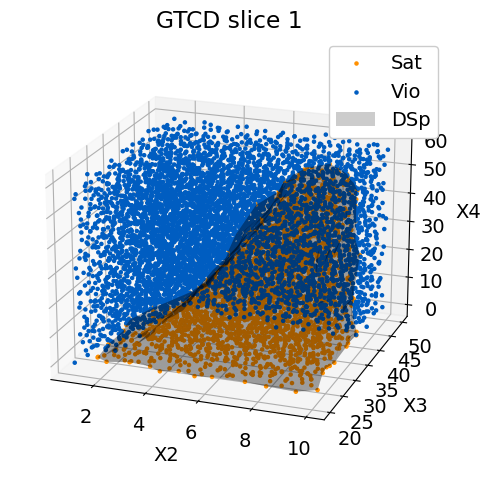

['X1', 'X3', 'X4']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |        127         |     2.500e+00      
    2     |     1.250e+00      |        True        |        127         |     1.250e+00      
    3     |     6.250e-01      |        True        |        127         |     6.250e-01      
    4     |     3.125e-01      |        True        |        127         |     3.125e-01      
    5     |     1.562e-01      |        True        |        127         |     1.562e-01      
    6     |     7.812e-02      |        True        |        127         | 

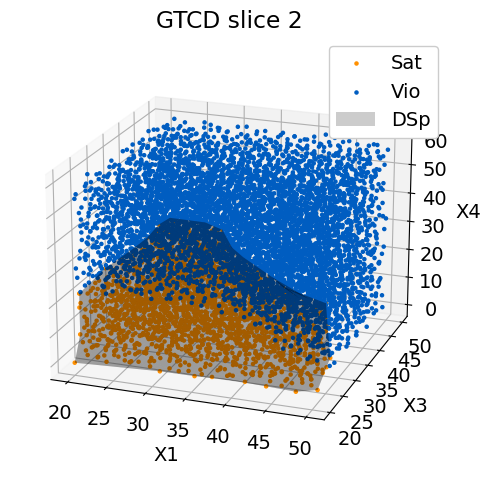

['X1', 'X2', 'X4']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |        347         |     2.500e+00      
    2     |     1.250e+00      |        True        |        347         |     1.250e+00      
    3     |     6.250e-01      |        True        |        347         |     6.250e-01      
    4     |     3.125e-01      |        True        |        347         |     3.125e-01      
    5     |     1.562e-01      |        True        |        347         |     1.562e-01      
    6     |     7.812e-02      |        True        |        347         | 

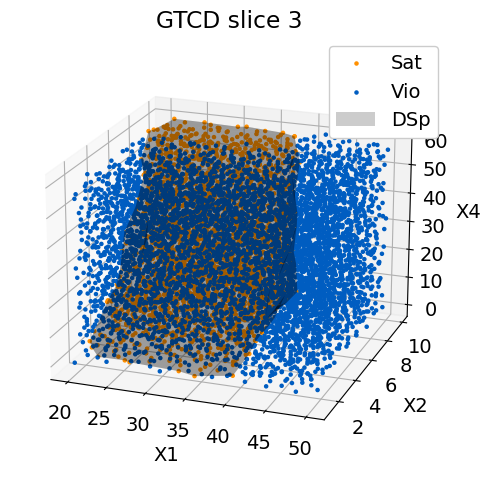

['X1', 'X2', 'X3']
Bisection search for alpha multiplier (radius)
    tol: 1.00e-03  maxiter: 50
    lb:  1.00e-30  ub:      5.00e+00
    maxvp: 0.00e+00  maxvnum: 0.00
____________________________________________________________________________________________
 No iter  |  alpha multiplier  |   Violation Flag   | Number vio inside  |   Bisection Gap    
____________________________________________________________________________________________
    1     |     2.500e+00      |        True        |        185         |     2.500e+00      
    2     |     1.250e+00      |        True        |        185         |     1.250e+00      
    3     |     6.250e-01      |        True        |        185         |     6.250e-01      
    4     |     3.125e-01      |        True        |        185         |     3.125e-01      
    5     |     1.562e-01      |        True        |        185         |     1.562e-01      
    6     |     7.812e-02      |        True        |        185         | 

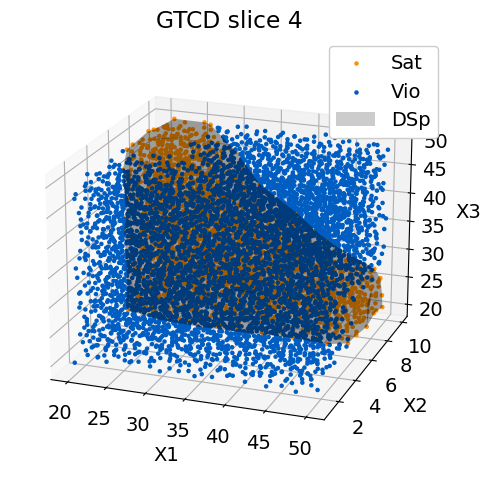

In [19]:
#plotting the results
benchmark_sol_4DGP = load_pkl('benchmark_sol_4DGP.pkl')

for problem_label in ['GTCD']:
    for no_slice in range(len(list(benchmark_sol_4DGP[problem_label].keys()))):
        opt_hidedsp = {'hidedsp': False, 'hidevio': False}
        ds = benchmark_sol_4DGP[problem_label][no_slice]
        sv = ds.df['sv_cut'].iloc[0]
        print(sv)
        ds.plot(sv, opt = opt_hidedsp)
        plt.title(problem_label + ' slice ' + str(no_slice+1))
        plt.show()